# Code For Linear Regression

In [109]:
#import libraries
%matplotlib inline
import numpy as np  # imports a fast numerical programming library
import scipy as sp  #imports stats functions, amongst other things
import matplotlib as mpl  # this actually imports matplotlib
import matplotlib.cm as cm  #allows us easy access to colormaps
import matplotlib.pyplot as plt  #sets up plotting under plt
import pandas as pd   #lets us handle data as dataframes
import seaborn as sns   #sets up styles and gives us more plotting options

In [15]:
train=pd.read_csv("C:\\Users\LENOVO\\Desktop\\Data_Science\\Data_sets\\Big_Mart_Sales\\train_v9rqX0R.csv")

In [16]:
test=pd.read_csv("C:\\Users\LENOVO\\Desktop\\Data_Science\\Data_sets\\Big_Mart_Sales\\test_AbJTz2l.csv")

In [9]:
pwd

'C:\\Users\\LENOVO\\Desktop\\Data_Science\\Machine_Learning_algo'

In [17]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [18]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Exploratory Data Analysis

We know that by using the right feataure we can improve our accuracy. So now let us use two feature MRP and
store establisment year to establish sales.NOw let us built a linear regression model in python considering only these 
two feature.

In [26]:
# defining feature matrix(X) and response vector(y)
X=train.loc[: ,['Item_MRP','Outlet_Establishment_Year']]
Y=train['Item_Outlet_Sales']

In [27]:
X

,Item_MRP,Outlet_Establishment_Year
0,249.8092,1999
1,48.2692,2009
2,141.6180,1999
3,182.0950,1998
4,53.8614,1987
...,...,...
8518,214.5218,1987
8519,108.1570,2002
8520,85.1224,2004
8521,103.1332,2009


In [28]:
Y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [25]:
#univariate analysis


<AxesSubplot:>

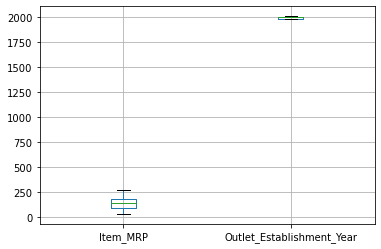

In [29]:
X.boxplot()

array([[<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>]],
      dtype=object)

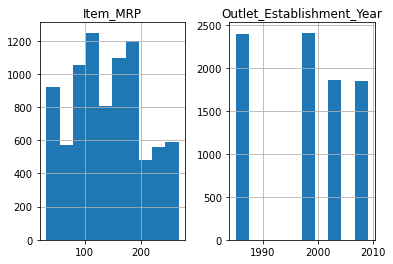

In [33]:
X.hist()

<AxesSubplot:>

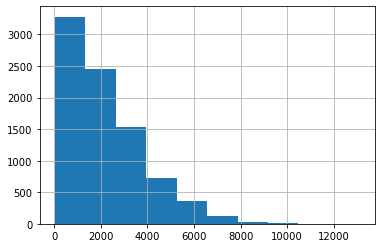

In [34]:
Y.hist()

Text(0, 0.5, 'Item_Outlet_Sales')

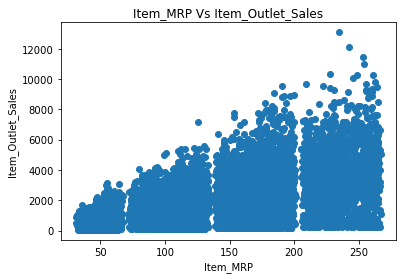

In [35]:
#Bivariate Analysis
# Visualising data with scatter plot between Item_MRP and Item_Outlet_Sales
plt.scatter(X['Item_MRP'],Y)
plt.title("Item_MRP Vs Item_Outlet_Sales")
plt.xlabel("Item_MRP")
plt.ylabel("Item_Outlet_Sales")

Text(0, 0.5, 'Item_Outlet_Sales')

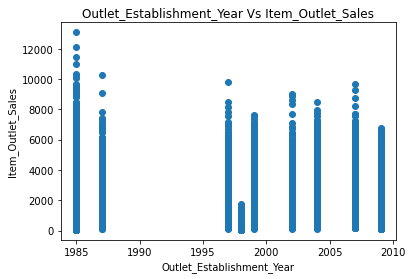

In [36]:
plt.scatter(X['Outlet_Establishment_Year'],Y)
plt.title("Outlet_Establishment_Year Vs Item_Outlet_Sales")
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Item_Outlet_Sales")

In [37]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [38]:
X.describe()

,Item_MRP,Outlet_Establishment_Year
count,8523.000000,8523.000000
mean,140.992782,1997.831867
std,62.275067,8.371760
min,31.290000,1985.000000
25%,93.826500,1987.000000
50%,143.012800,1999.000000
75%,185.643700,2004.000000
max,266.888400,2009.000000


there is no missing value and no outlier value

# Splitting the dataset into the Training set and Test set

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

In [40]:
print(X_train)
print(X_test)

      Item_MRP  Outlet_Establishment_Year
4103   87.2514                       2009
6238  197.8768                       1985
4145  259.6936                       2004
8214  255.9672                       2009
238   109.8912                       1985
...        ...                        ...
4373   49.1034                       1998
7891  188.1872                       1985
4859   78.3960                       2004
3264  121.4072                       2002
2732  182.0634                       1999

[5682 rows x 2 columns]
      Item_MRP  Outlet_Establishment_Year
4931  159.5604                       2002
4148   64.5510                       1985
7423  129.6626                       2007
4836  143.1154                       2007
944   195.0478                       1987
...        ...                        ...
666    76.9012                       1987
4899  250.1092                       1999
7269  123.7730                       1997
5752  265.0884                       2004
6740   85

# Training the Simple Linear Regression model on the Training set

In [41]:
# create linear regression object
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [42]:
# train the model using the training sets
reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
# regression coefficients
print('Coefficients:',reg.coef_)
# regression intercept
print('Intercept:' ,reg.intercept_)

Coefficients: [15.52645628 -8.81592519]
Intercept: 17598.558067090235


# Predicting the Test set results

In [48]:
y_pred = reg.predict(X_test)

In [49]:
y_pred

array([2426.4834076 , 1101.19484087, 1918.19689717, ..., 1914.9115322 ,
       4047.3274352 , 1210.07558854])

In [50]:
# variance score or the R-squared value: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, Y_test)))

Variance score: 0.31704872120989325


R_square=31.7% , it means 31.7% of variance in sales is explained by Year of establishment and MRP

In [54]:
#calculating the mse
mse=np.mean((y_pred-Y_test)**2)
mse

2044955.0737104113

Now, we are introducing the another feature i.e Weight to improve the ability to make accurate prediction

# Multiple regression

In [93]:
#filling the NaN values with the maen of the non null values
train['Item_Weight'].fillna((train['Item_Weight'].mean()),inplace=True)

In [94]:
X=train.loc[:,['Item_MRP','Outlet_Establishment_Year','Item_Weight']]

In [95]:
X

,Item_MRP,Outlet_Establishment_Year,Item_Weight
0,249.8092,1999,9.300
1,48.2692,2009,5.920
2,141.6180,1999,17.500
3,182.0950,1998,19.200
4,53.8614,1987,8.930
...,...,...,...
8518,214.5218,1987,6.865
8519,108.1570,2002,8.380
8520,85.1224,2004,10.600
8521,103.1332,2009,7.210


In [96]:
Y=train.Item_Outlet_Sales
Y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [97]:
# splitting the dataset into training set and test set
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=1/3)

In [98]:
x_train

,Item_MRP,Outlet_Establishment_Year,Item_Weight
5607,152.9998,2007,5.880000
3152,45.5060,1985,12.857645
6671,176.9028,1985,12.857645
3500,34.3532,2004,16.750000
776,106.3938,2004,12.300000
...,...,...,...
4616,142.5786,2009,15.100000
5790,245.3118,1998,11.300000
565,259.7278,1987,6.570000
7044,172.0422,1999,10.300000


In [118]:
x_train.describe()

,Item_MRP,Outlet_Establishment_Year,Item_Weight
count,5682.000000,5682.000000,5682.000000
mean,141.121520,1997.908131,12.894592
std,62.578287,8.350237,4.241318
min,31.490000,1985.000000,4.555000
25%,93.488300,1987.000000,9.395000
50%,143.098300,1999.000000,12.857645
75%,185.916100,2004.000000,16.100000
max,266.888400,2009.000000,21.350000


In [99]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
# splitting the dataset into training set and test set
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=1/3)

In [101]:
#training the model
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
#pred on x_test
y_pred=reg.predict(x_test)

In [103]:
y_pred

array([2128.06385031,  923.4103838 , 1989.72589988, ..., 3185.94884392,
       3686.71848101, 1887.6844765 ])

In [104]:
#mse
mse=np.mean((y_pred-y_test)**2)
mse

2009682.8758630964

mse changes according to the train and test set

In [106]:
# variance score or the R-squared value: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(x_test, y_test)))

Variance score: 0.32971443393504263


r_square=32%  There is an increase in the value of R_square .Does it mean the addition of item_weight is useful?
can't say

In [116]:
#calculating coeffecients
coeff=pd.DataFrame(x_train.columns)
coeff['Coefficient Estimate']=pd.Series(reg.coef_)

In [117]:
coeff

,0,Coefficient Estimate
0,Item_MRP,15.303936
1,Outlet_Establishment_Year,-9.366313
2,Item_Weight,-5.382179
